# Closing Stock Price Prediction using LSTM.

In [1]:
#Importing Dependencies
import math
import pandas_datareader as web
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM
from keras.models import Sequential
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Getting the stock data from the web
df_raw_data = web.DataReader('AAPL', data_source='yahoo',start='2012-01-01', end='2021-04-21')
df_raw_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
...,...,...,...,...,...,...
2021-04-15,135.000000,133.639999,133.820007,134.500000,89347100.0,134.500000
2021-04-16,134.669998,133.279999,134.300003,134.160004,84818500.0,134.160004
2021-04-19,135.470001,133.339996,133.509995,134.839996,94264200.0,134.839996


In [3]:
df_raw_data.shape

(2340, 6)

Text(0, 0.5, 'Closing Price ($)')

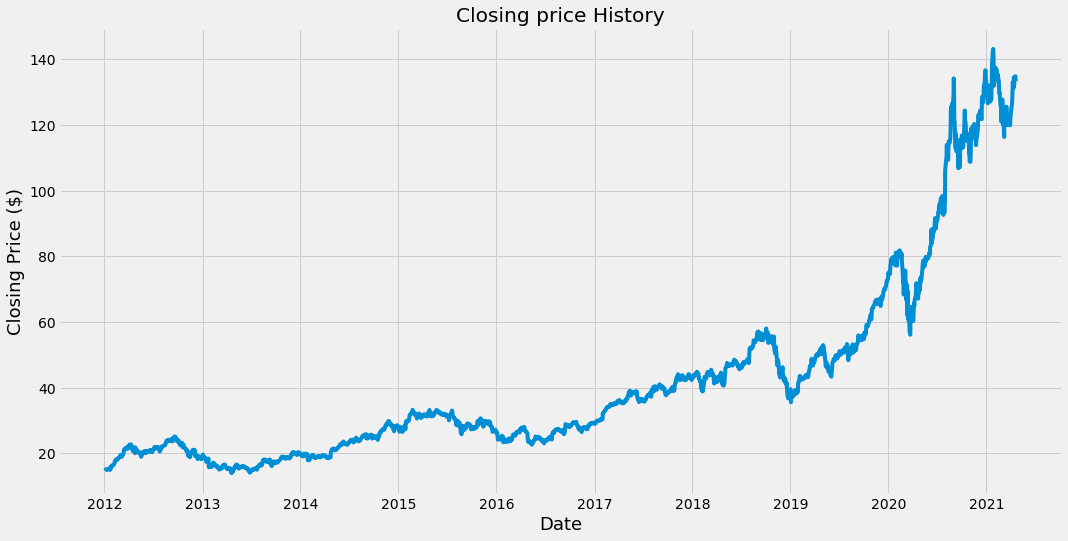

In [4]:
# Vizualising closing data 
plt.figure(figsize=(16,8))
plt.title('Closing price History')
plt.plot(df_raw_data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price ($)', fontsize=18)

In [5]:
# creating a new data frame with only closing data 
data = df_raw_data.filter(['Close'])
# Converting the data frame to numpy array
dataset = data.values


In [6]:
# Getting the Number of rows to train the data

training_data_len = math.ceil( len(dataset)*.8)
training_data_len

1872

In [7]:
# Scaling the data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00572147],
       [0.00633231],
       [0.00760099],
       ...,
       [0.93560989],
       [0.92222113],
       [0.92225986]])

In [8]:
# Creating Training data set
# Creating a Scaled data set
train_data = scaled_data[:training_data_len,:]
# Splitting the data set to x_train and y_train
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()


[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00822841, 0.01019361, 0.00825882,
       0.01551431, 0.01495322, 0.01568568, 0.01726944, 0.01822855,
       0.01814839, 0.01785265, 0.01911303, 0.02029878, 0.02164209,
       0.02381183, 0.02836966, 0.02843875, 0.03097611, 0.0328722 ,
       0.02961346, 0.03086831, 0.03084343, 0.034362  , 0.03386171,
       0.03478765, 0.03645157, 0.03737752, 0.04004478, 0.04198786,
       0.04254895, 0.0427452 , 0.03942288, 0.03862131, 0.03874017,
       0.04186349, 0.04274244, 0.04463025, 0.04908028, 0.05501734,
       0.05390621, 0.05390897, 0.05820147, 0.05954478, 0.05858842,
       0.05771501, 0.05680565, 0.05982669, 0.0618997 , 0.06276759])]
[0.06062272301844436]



In [9]:
# Converting xx_train and y_train to numpy array to train LSTM

x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(1812, 60)

In [10]:
# Reshaping the x_train dataset (because LSTM requires the date to be 3dimentional)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [11]:
#Checking the shape
x_train.shape

(1812, 60, 1)

In [12]:
# Building the LSTM Model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [13]:
# Complie the Model
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [14]:
# Training model

model.fit(x_train,y_train,batch_size=1,epochs=1)

1812/1812 [==============================] - 76s 40ms/step - loss: 3.8733e-04


In [15]:
# Create testing data set
# Creating a new array containg skill vaues from 1543 till 2003
test_data = scaled_data[training_data_len-60:,:]
# Creating x_test and y_test
x_test =[]
y_test = dataset[training_data_len:,:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [16]:
# Convert data set to numpy arrany
x_test = np.array(x_test)

In [17]:
# Reshaing the array as LSTM model needs a 3D array

x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))
x_test.shape

(468, 60, 1)

In [18]:
# Getting predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [19]:
# Getting RMSE (Measure of model perdormance (lower value is better))
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

5.258522661323221

This is a very good value for the model

In [20]:
# Plotting the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid.shape

(468, 1)

In [21]:
predictions.shape

(468, 1)

In [22]:
valid['Predictions'] = predictions

<ipython-input-22-051906f0b5db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


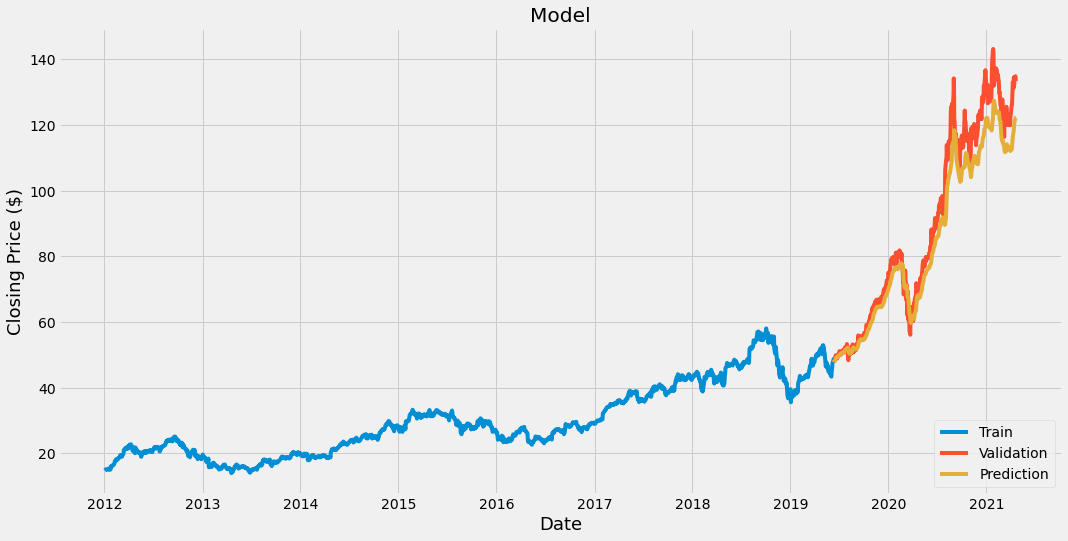

In [23]:
# Visualization
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Validation','Prediction'],loc='lower right')
plt.show()

Its very clear that the Validation data (test) and Predection data are very closing proving the models accuracy.

In [24]:
# Show the valid and predicted values
valid.head()

,Close,Predictions
Date,,
2019-06-13,48.537498,47.748344
2019-06-14,48.185001,48.101925
2019-06-17,48.472500,48.288010
2019-06-18,49.612499,48.414722
2019-06-19,49.467499,48.659969


In [25]:
# Getting the quote 
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-04-21')
# Creating a new data frame
new_df = apple_quote.filter(['Close'])
# Getting the last 60 day column values and convert the data frame to a np array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create a empty list 
x_test =[]
# Append the last 60 days to x_test
x_test.append(last_60_days_scaled)
# Converting x_test to a np array
x_test = np.array(x_test)
# Reshape data for 3D
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
# Predicted scaled price 
pred_price = model.predict(x_test)
# Undoing the scaled data
pred_price = scaler.inverse_transform(pred_price)
print (pred_price)

[[122.235435]]


In [26]:
apple_quote_2 = web.DataReader('AAPL', data_source='yahoo', start='2021-04-21', end='2021-04-21')
apple_quote_2

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-20,135.529999,131.809998,135.020004,133.110001,94660400,133.110001
2021-04-21,133.500000,131.309998,132.360001,133.139999,46027428,133.139999
